In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


In [2]:
df = pd.read_csv('../input/Mall_Customers.csv')


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


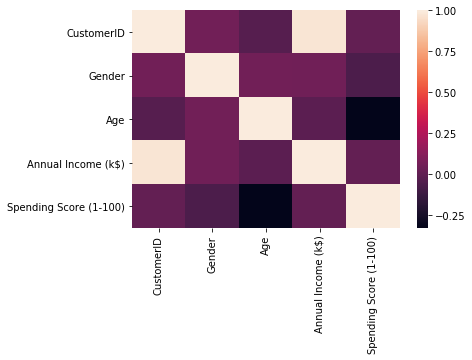

In [54]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df.corr())

Here we first get an overview of the dataset and understand it before we make any form of clustering

In [4]:
df.shape

(200, 5)

We now check if there are any null values that are present in the dataset first

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Before that we have to map the values in gender to either a 1 or 0, we can do this using onehotencoder

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [7]:
df_tf = df
df_tf.Gender = le.fit_transform(df_tf['Gender'])

In [8]:
df_tf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


We will now install some useful packages for us to process the data

In [9]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [10]:
scaler = MinMaxScaler()

In [11]:
df_tf['Age'] = scaler.fit_transform(df_tf[['Age']])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
df_tf['Annual Income (k$)'] = scaler.fit_transform(df_tf[['Annual Income (k$)']])
df_tf['Spending Score (1-100)'] = scaler.fit_transform(df_tf[['Spending Score (1-100)']])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
df_tf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,0.019231,0.000000,0.387755
1,2,1,0.057692,0.000000,0.816327
2,3,0,0.038462,0.008197,0.051020
3,4,0,0.096154,0.008197,0.775510
4,5,0,0.250000,0.016393,0.397959


In [59]:
X = df_tf.drop(['CustomerID','Spending Score (1-100)'], axis='columns')

In [60]:
X.head()

,Gender,Age,Annual Income (k$)
0,1,0.019231,0.000000
1,1,0.057692,0.000000
2,0,0.038462,0.008197
3,0,0.096154,0.008197
4,0,0.250000,0.016393


Now is where we start to implelment the actual algorithm, we will iterate the data over a range of K values and then fit them into the KMeans algorithm. We will then append the sum of squred errors using 'inertia_' method and then plot the sse. 

In [61]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared Errors')

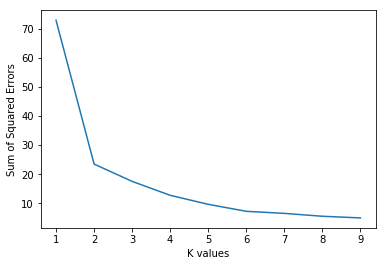

In [62]:
plt.plot(k_rng,sse)
plt.xlabel('K values')
plt.ylabel('Sum of Squared Errors')

We can tell that the elbow method's optimal elbow value is either 2 or 4, let's plot both and compare

In [63]:
km = KMeans(n_clusters=4)

In [64]:
y_4 = km.fit_predict(X)
y_4

array([1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 0, 2, 1, 1, 2, 1, 3, 2, 1, 1,
       0, 1, 0, 1, 0, 1, 2, 2, 3, 2, 3, 1, 0, 2, 0, 2, 2, 2, 0, 1, 3, 2,
       0, 2, 0, 2, 2, 2, 0, 1, 2, 3, 0, 3, 0, 3, 2, 3, 3, 1, 0, 0, 3, 1,
       0, 0, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 2, 0, 3, 1, 3, 0, 2, 3, 0, 2,
       2, 0, 0, 1, 3, 2, 2, 1, 0, 2, 3, 1, 2, 0, 3, 1, 3, 2, 0, 3, 3, 3,
       3, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 3, 1, 3, 1,
       2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2,
       3, 1, 3, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1,
       1, 1], dtype=int32)

In [65]:
X['cluster'] = y_4

In [66]:
X.head()

,Gender,Age,Annual Income (k$),cluster
0,1,0.019231,0.000000,1
1,1,0.057692,0.000000,1
2,0,0.038462,0.008197,2
3,0,0.096154,0.008197,2
4,0,0.250000,0.016393,2


Separating the data by their clusters

In [72]:
cluster0 = X.loc[X.cluster==0]
cluster1 = X.loc[X.cluster==1]
cluster2 = X.loc[X.cluster==2]
cluster3 = X.loc[X.cluster==3]

In [73]:
cluster1.head()

,Gender,Age,Annual Income (k$),cluster
0,1,0.019231,0.000000,1
1,1,0.057692,0.000000,1
14,1,0.365385,0.040984,1
15,1,0.076923,0.040984,1
17,1,0.038462,0.049180,1


In [74]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

Since from the correlation plot earlier,we 

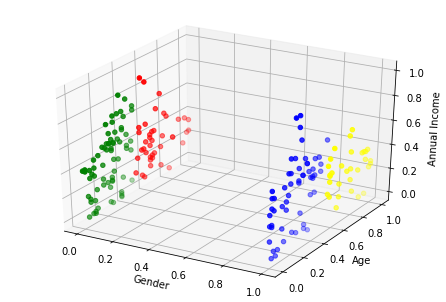

In [76]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income')
ax.scatter(cluster0['Gender'],cluster0['Age'],cluster0['Annual Income (k$)'],color='red')
ax.scatter(cluster1['Gender'],cluster1['Age'],cluster1['Annual Income (k$)'],color='blue')
ax.scatter(cluster2['Gender'],cluster2['Age'],cluster2['Annual Income (k$)'],color='green')
ax.scatter(cluster3['Gender'],cluster3['Age'],cluster3['Annual Income (k$)'],color='yellow')